In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('D:/jantung/heart_failure_clinical_records_dataset.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
ValueCounts_DEATH_EVENT = df['DEATH_EVENT'].value_counts()
ValueCounts_DEATH_EVENT

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

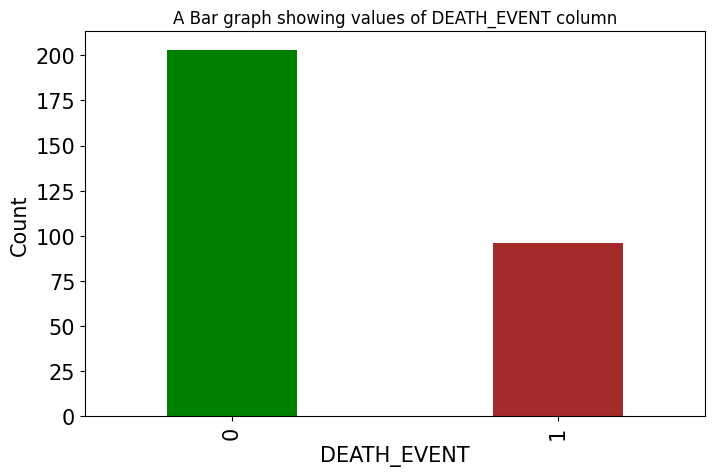

In [7]:
ax = ValueCounts_DEATH_EVENT.plot(kind='bar',figsize=(8,5), width=0.40 ,color=['green','brown'] ,fontsize=15, title='A Bar graph showing values of DEATH_EVENT column' )
ax.set_xlabel("DEATH_EVENT",fontsize=15)      
ax.set_ylabel("Count",fontsize=15)
plt.show()

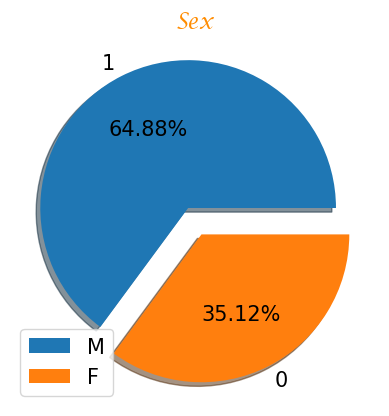

In [8]:
plt.rcParams.update({'font.size': 15})
ax=df['sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 40,color='DarkOrange',font='Lucida Calligraphy');
plt.legend(labels=['M','F'])
plt.axis('off');

In [9]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
X = df.drop (columns='DEATH_EVENT', axis=1)
Y = df['DEATH_EVENT']

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler()

In [13]:
standarized_data = scaler.transform(X)

In [14]:
X = standarized_data
Y = df['DEATH_EVENT']

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (209, 12) (90, 12)


In [17]:
classifier = svm.SVC(kernel='linear')

In [18]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [19]:
x_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)

In [20]:
print('Akurasi pada data training = ', training_data_accuracy)

Akurasi pada data training =  0.8325358851674641


In [21]:
x_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)

In [22]:
print('Akurasi pada data test = ', test_data_accuracy)

Akurasi pada data test =  0.8111111111111111


In [25]:
input_data = (75.0, 0, 582, 0, 20, 1, 265000.00, 1.9, 130, 1, 0, 4)

data_array = np.array(input_data)

reshape = data_array.reshape(1,-1)

std_data = scaler.transform(reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('Tidak beresiko gagal jantung')
else :
    print('Beresiko gagal jantung')

[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 -8.47579380e-01
  -1.53055953e+00  1.35927151e+00  1.68164843e-02  4.90056987e-01
  -1.50403612e+00  7.35688190e-01 -6.87681906e-01 -1.62950241e+00]]
[1]
Beresiko gagal jantung


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
import pickle
filename = 'gagal_jantung.sav'
pickle.dump(classifier,open(filename,'wb'))